<a href="https://colab.research.google.com/github/UlasDeveci/UlasDeveci/blob/main/90derece%C3%B6nde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

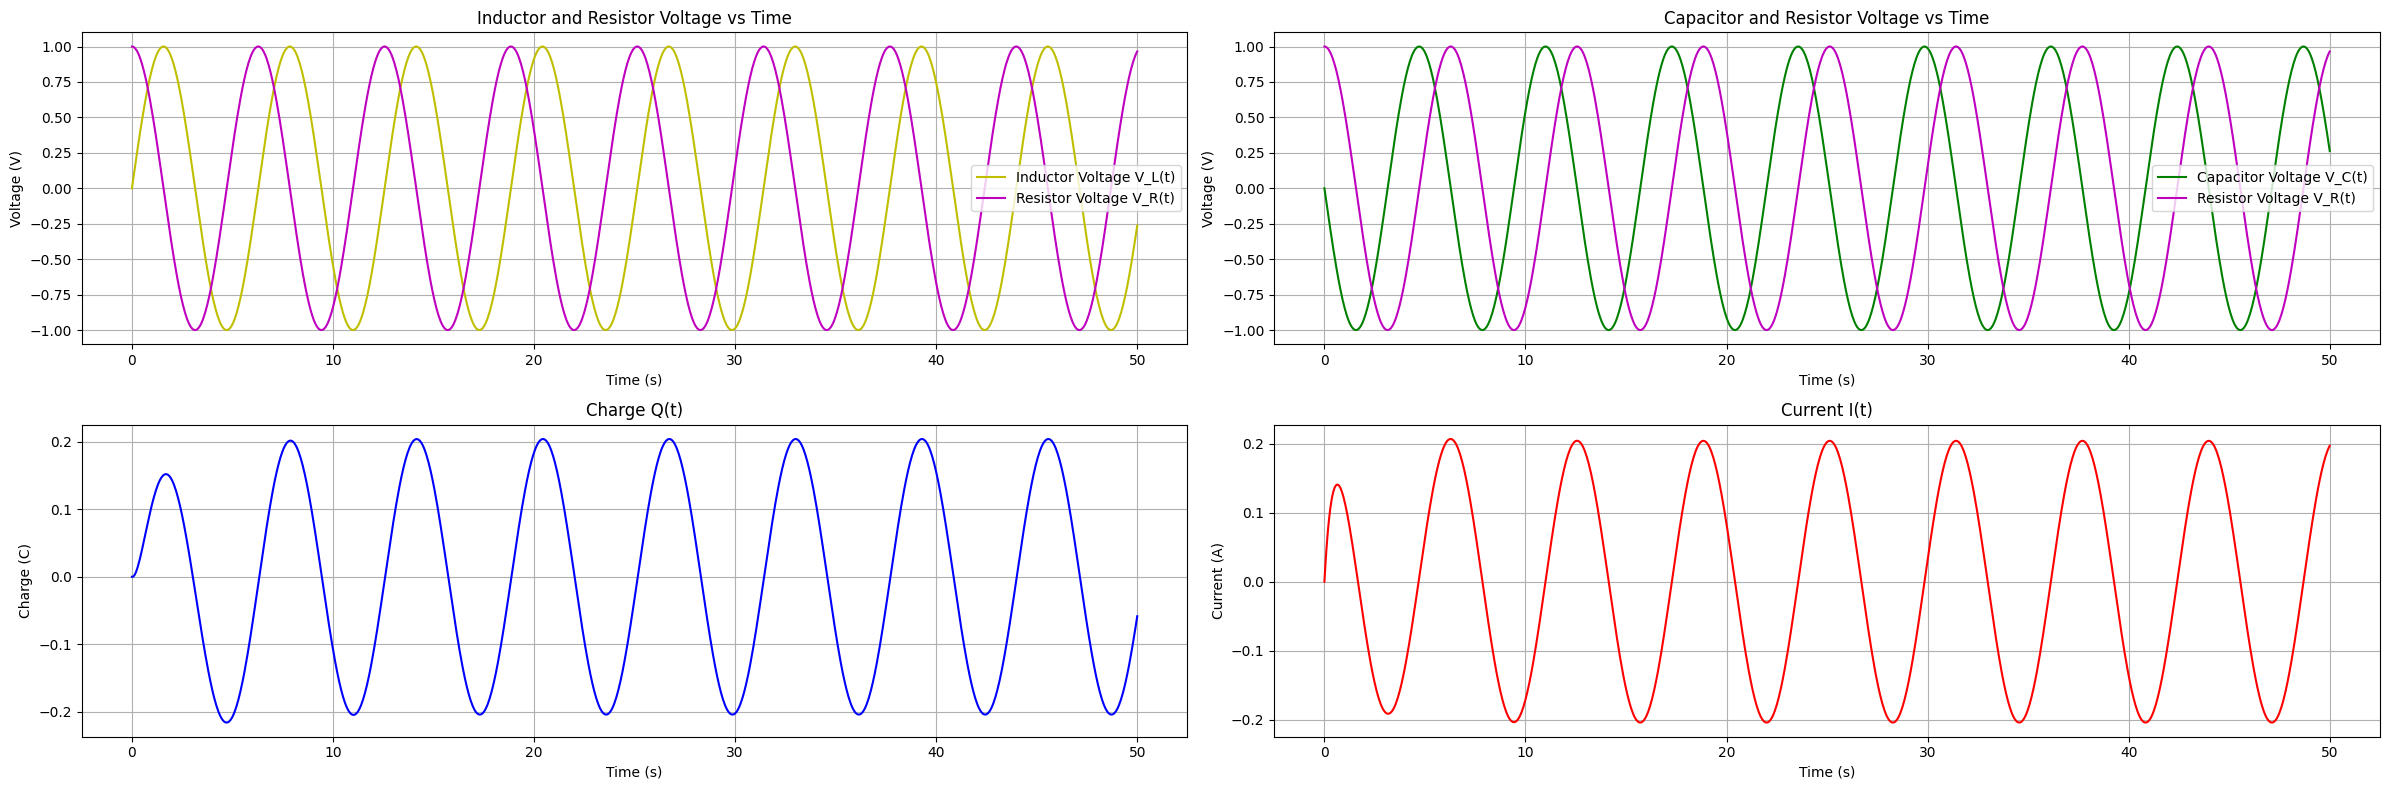

In [2]:
import math
import matplotlib.pyplot as mpl_p

# Parametreler
# RLC devresinin parametreleri
L = 2.0  # İndüktans (H)
R = 5.0  # Direnç (ohm)
C = 0.5  # Kapasitans (F)
V0 = 1.0  # AC kaynağının genliği (V)
Vm = 5   # Maksimum kaynak gerilimi
final_time = 20.0  # Son zaman
omega = 1.0  # AC kaynağının açısal frekansı (rad/s)

# Diferansiyel denklem
def rlc(t, Q, I):
    dQdt = I
    dIdt = (V0 * math.cos(omega * t) - Q / C - R * I) / L
    return dQdt, dIdt

# Başlangıç koşulları
Q0 = 0.0
I0 = 0.0

# Zaman aralığı
t_start = 0
t_end = 50
num_points = 1000
dt = (t_end - t_start) / num_points

# Zaman dizisi
t_values = [t_start + i * dt for i in range(num_points + 1)]

# Euler yöntemi ile çözüm
Q_values = [Q0]
I_values = [I0]

for t in t_values[:-1]:
    dQdt, dIdt = rlc(t, Q_values[-1], I_values[-1])
    Q_values.append(Q_values[-1] + dQdt * dt)
    I_values.append(I_values[-1] + dIdt * dt)

# Voltajların hesaplanması
V_C_values = [Q / C for Q in Q_values]
V_R_values = [R * I for I in I_values]
V_L_values = [(L * (I_values[i+1] - I_values[i]) / dt) for i in range(len(I_values) - 1)]
V_L_values.append(V_L_values[-1])  # son değeri tamamla

# Faz kaymaları ekleyerek hesaplama
V_R_rescaled = [V0 * math.cos(omega * t) for t in t_values]  # Direnç voltajı ile aynı fazda
V_L_phase_shifted = [V0 * math.sin(omega * t) for t in t_values]  # 90 derece önde
V_C_phase_shifted = [-V0 * math.sin(omega * t) for t in t_values]  # 90 derece geride

# Grafikler
mpl_p.figure(figsize=(24, 8))

# İndüktör ve Direnç Voltajı grafiği
mpl_p.subplot(2, 2, 1)
mpl_p.plot(t_values, V_L_phase_shifted, label='Inductor Voltage V_L(t)', color='y')
mpl_p.plot(t_values, V_R_rescaled, label='Resistor Voltage V_R(t)', color='m')
mpl_p.title('Inductor and Resistor Voltage vs Time')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Voltage (V)')
mpl_p.legend()
mpl_p.grid(True)

# Kondansatör ve Direnç Voltajı grafiği
mpl_p.subplot(2, 2, 2)
mpl_p.plot(t_values, V_C_phase_shifted, label='Capacitor Voltage V_C(t)', color='g')
mpl_p.plot(t_values, V_R_rescaled, label='Resistor Voltage V_R(t)', color='m')
mpl_p.title('Capacitor and Resistor Voltage vs Time')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Voltage (V)')
mpl_p.legend()
mpl_p.grid(True)

# Q(t) grafiği
mpl_p.subplot(2, 2, 3)
mpl_p.plot(t_values, Q_values, label='Charge Q(t)', color='b')
mpl_p.title('Charge Q(t)')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Charge (C)')
mpl_p.grid(True)

# I(t) grafiği
mpl_p.subplot(2, 2, 4)
mpl_p.plot(t_values, I_values, label='Current I(t)', color='r')
mpl_p.title('Current I(t)')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Current (A)')
mpl_p.grid(True)

mpl_p.tight_layout()
mpl_p.show()
